In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [7]:
# Load training dataset
train_df = pd.read_csv(r"C:\Users\Admin\Desktop\datasets-i\train_aWnotuB.csv")

# Load test datasets
test_df1 = pd.read_csv(r"C:\Users\Admin\Desktop\datasets-i\test_BdBKkAj.csv")
# Load test datasets
test_df2 = pd.read_csv(r"C:\Users\Admin\Desktop\datasets-i\datasets_8494_11879_test_BdBKkAj.csv")


# Display the first few rows
train_df.head()


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [8]:
# Convert DateTime column to datetime format
train_df['DateTime'] = pd.to_datetime(train_df['DateTime'])
test_df1['DateTime'] = pd.to_datetime(test_df1['DateTime'])
test_df2['DateTime'] = pd.to_datetime(test_df2['DateTime'])

# Display the first few rows to verify the conversion
train_df.head()


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [9]:
# Check for missing values
train_df.isnull().sum()
test_df1.isnull().sum()
test_df2.isnull().sum()


DateTime    0
Junction    0
ID          0
dtype: int64

In [10]:
# Drop rows with missing values (if any)
train_df = train_df.dropna()
test_df1 = test_df1.dropna()
test_df2 = test_df2.dropna()


In [11]:
# Extracting useful features from DateTime
train_df['Hour'] = train_df['DateTime'].dt.hour
train_df['DayOfWeek'] = train_df['DateTime'].dt.dayofweek
train_df['IsWeekend'] = (train_df['DayOfWeek'] >= 5).astype(int)

test_df1['Hour'] = test_df1['DateTime'].dt.hour
test_df1['DayOfWeek'] = test_df1['DateTime'].dt.dayofweek
test_df1['IsWeekend'] = (test_df1['DayOfWeek'] >= 5).astype(int)

test_df2['Hour'] = test_df2['DateTime'].dt.hour
test_df2['DayOfWeek'] = test_df2['DateTime'].dt.dayofweek
test_df2['IsWeekend'] = (test_df2['DayOfWeek'] >= 5).astype(int)

# Display the updated dataframe
train_df.head()


,DateTime,Junction,Vehicles,ID,Hour,DayOfWeek,IsWeekend
0,2015-11-01 00:00:00,1,15,20151101001,0,6,1
1,2015-11-01 01:00:00,1,13,20151101011,1,6,1
2,2015-11-01 02:00:00,1,10,20151101021,2,6,1
3,2015-11-01 03:00:00,1,7,20151101031,3,6,1
4,2015-11-01 04:00:00,1,9,20151101041,4,6,1


In [13]:
# Check for NaN or infinite values in the 'Vehicles' column
print(train_df['Vehicles'].isna().sum())  # Count NaN values
print(np.isinf(train_df['Vehicles']).sum())  # Count infinite values


0
0


In [14]:
train_df = train_df.dropna(subset=['Vehicles'])


In [15]:
train_df['Vehicles'] = train_df['Vehicles'].replace([np.inf, -np.inf], np.nan)
train_df = train_df.dropna(subset=['Vehicles'])


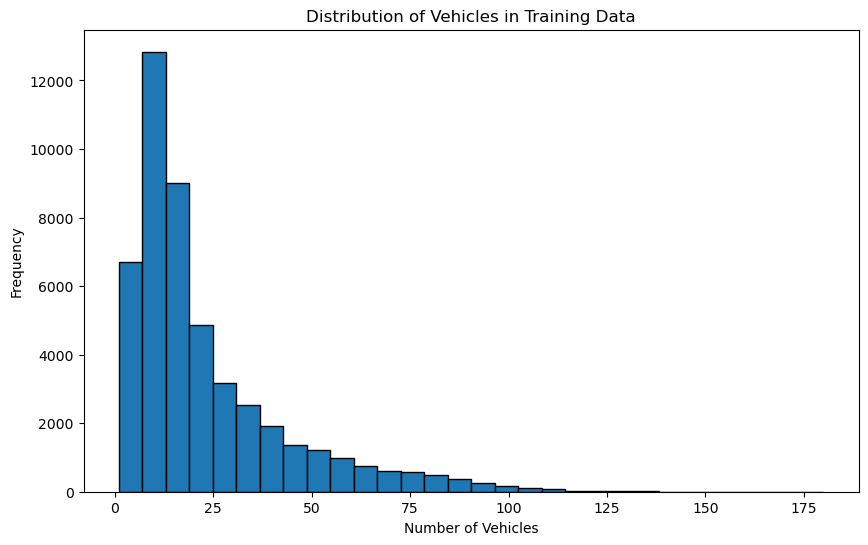

In [19]:
# Plot the distribution using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(train_df['Vehicles'], bins=30, edgecolor='black')
plt.title('Distribution of Vehicles in Training Data')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.show()


In [20]:
train_df['DateTime'] = pd.to_datetime(train_df['DateTime'])


In [21]:
train_df.set_index('DateTime', inplace=True)


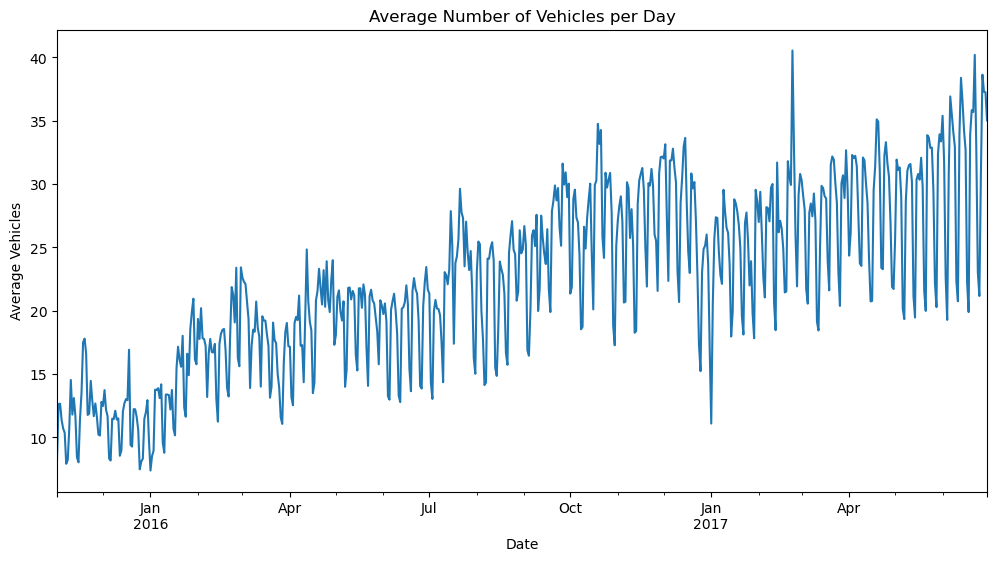

In [22]:
plt.figure(figsize=(12, 6))
train_df['Vehicles'].resample('D').mean().plot()  # Resampling by day (you can change it to 'H' for hourly)
plt.title('Average Number of Vehicles per Day')
plt.xlabel('Date')
plt.ylabel('Average Vehicles')
plt.show()


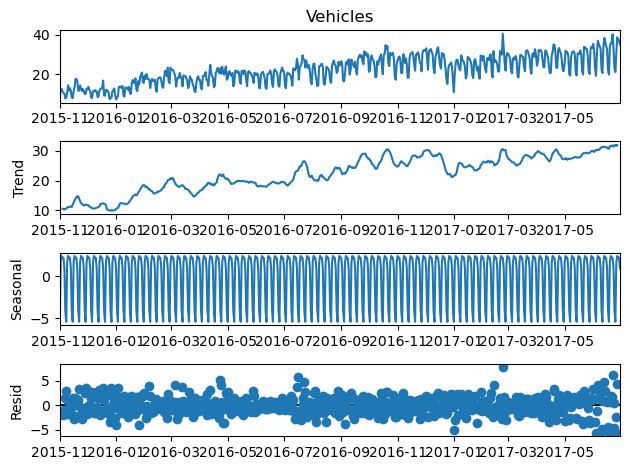

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(train_df['Vehicles'].resample('D').mean(), model='additive')
decomposition.plot()
plt.show()


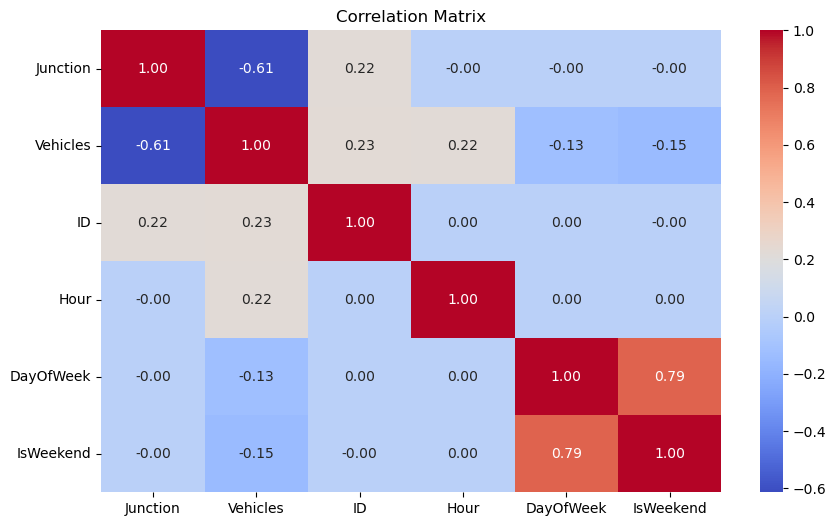

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [25]:
# Extracting time-based features
train_df['Year'] = train_df.index.year
train_df['Month'] = train_df.index.month
train_df['Day'] = train_df.index.day
train_df['Weekday'] = train_df.index.weekday  # Monday=0, Sunday=6
train_df['Hour'] = train_df.index.hour
train_df['Minute'] = train_df.index.minute
train_df['Second'] = train_df.index.second


In [26]:
train_df['Lag_1'] = train_df['Vehicles'].shift(1)  # Previous hour's vehicle count
train_df['Lag_24'] = train_df['Vehicles'].shift(24)  # Previous day's vehicle count (if data is hourly)


In [27]:
train_df['Rolling_Mean_24'] = train_df['Vehicles'].rolling(window=24).mean()  # 24-hour rolling mean
train_df['Rolling_Mean_7'] = train_df['Vehicles'].rolling(window=7).mean()  # 7-day rolling mean


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-

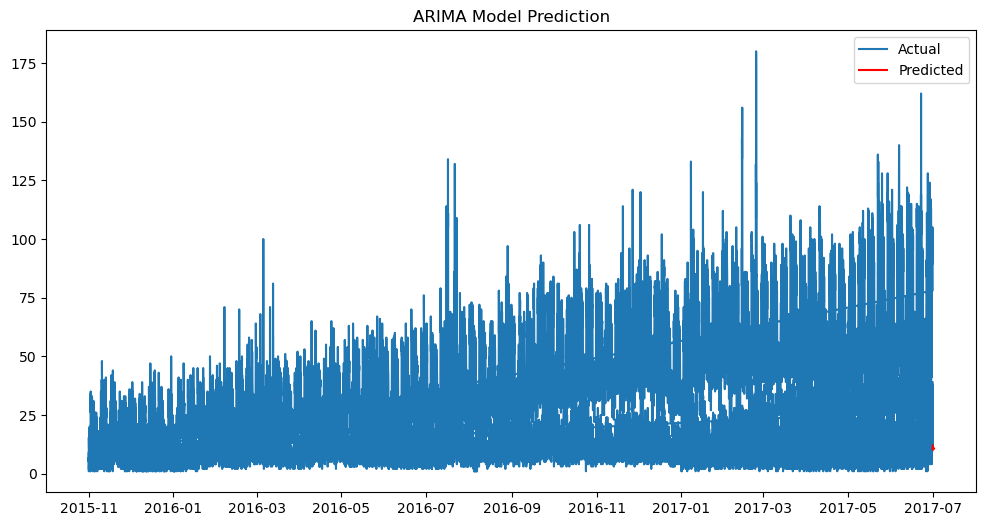

Mean Squared Error: 38.25302172783677


In [28]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Train ARIMA model
model = ARIMA(train_df['Vehicles'].dropna(), order=(5,1,0))  # Adjust (p,d,q) for best results
model_fit = model.fit()

# Predict future values
predictions = model_fit.forecast(steps=24)  # Forecast next 24 hours

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(train_df['Vehicles'], label='Actual')
plt.plot(pd.date_range(train_df.index[-1], periods=25, freq='H')[1:], predictions, label='Predicted', color='red')
plt.title('ARIMA Model Prediction')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(train_df['Vehicles'].dropna()[-24:], predictions)  # Compare the last 24 hours
print(f'Mean Squared Error: {mse}')


In [30]:
print(X.shape)
print(y.shape)


(48096, 9)
(161664,)


In [32]:
print(train_df.columns)


Index(['Junction', 'Vehicles', 'ID', 'Hour', 'DayOfWeek', 'IsWeekend', 'Year',
       'Month', 'Day', 'Weekday', 'Minute', 'Second', 'Lag_1', 'Lag_24',
       'Rolling_Mean_24', 'Rolling_Mean_7'],
      dtype='object')


In [33]:
X = train_df.drop(columns=['Vehicles', 'ID'])  # Drop the non-feature columns
y = train_df['Vehicles']  # Target column


In [34]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [36]:
# Check for missing values in features and target
print(X.isnull().sum())  # For features
print(y.isnull().sum())  # For target


Junction            0
Hour                0
DayOfWeek           0
IsWeekend           0
Year                0
Month               0
Day                 0
Weekday             0
Minute              0
Second              0
Lag_1               1
Lag_24             24
Rolling_Mean_24    23
Rolling_Mean_7      6
dtype: int64
0


In [37]:
# Impute missing values with the mean of each column
X['Lag_1'].fillna(X['Lag_1'].mean(), inplace=True)
X['Lag_24'].fillna(X['Lag_24'].mean(), inplace=True)
X['Rolling_Mean_24'].fillna(X['Rolling_Mean_24'].mean(), inplace=True)
X['Rolling_Mean_7'].fillna(X['Rolling_Mean_7'].mean(), inplace=True)


In [39]:
# Check for NaN values
print(X_train.isna().sum())

# Check for infinite values
print((X_train == np.inf).sum())
print((X_train == -np.inf).sum())


Junction            0
Hour                0
DayOfWeek           0
IsWeekend           0
Year                0
Month               0
Day                 0
Weekday             0
Minute              0
Second              0
Lag_1               1
Lag_24             24
Rolling_Mean_24    23
Rolling_Mean_7      6
dtype: int64
Junction           0
Hour               0
DayOfWeek          0
IsWeekend          0
Year               0
Month              0
Day                0
Weekday            0
Minute             0
Second             0
Lag_1              0
Lag_24             0
Rolling_Mean_24    0
Rolling_Mean_7     0
dtype: int64
Junction           0
Hour               0
DayOfWeek          0
IsWeekend          0
Year               0
Month              0
Day                0
Weekday            0
Minute             0
Second             0
Lag_1              0
Lag_24             0
Rolling_Mean_24    0
Rolling_Mean_7     0
dtype: int64


In [41]:
# Check for NaN values in the training data
print(X_train.isnull().sum())
print(y_train.isnull().sum())

# Check for infinity values in the training data
print((X_train == float('inf')).sum())
print((X_train == -float('inf')).sum())


Junction            0
Hour                0
DayOfWeek           0
IsWeekend           0
Year                0
Month               0
Day                 0
Weekday             0
Minute              0
Second              0
Lag_1               1
Lag_24             24
Rolling_Mean_24    23
Rolling_Mean_7      6
dtype: int64
0
Junction           0
Hour               0
DayOfWeek          0
IsWeekend          0
Year               0
Month              0
Day                0
Weekday            0
Minute             0
Second             0
Lag_1              0
Lag_24             0
Rolling_Mean_24    0
Rolling_Mean_7     0
dtype: int64
Junction           0
Hour               0
DayOfWeek          0
IsWeekend          0
Year               0
Month              0
Day                0
Weekday            0
Minute             0
Second             0
Lag_1              0
Lag_24             0
Rolling_Mean_24    0
Rolling_Mean_7     0
dtype: int64


In [42]:
# Impute missing values with the mean for each column
X_train.fillna(X_train.mean(), inplace=True)

# Check if there are any remaining NaN values
print(X_train.isnull().sum())


Junction           0
Hour               0
DayOfWeek          0
IsWeekend          0
Year               0
Month              0
Day                0
Weekday            0
Minute             0
Second             0
Lag_1              0
Lag_24             0
Rolling_Mean_24    0
Rolling_Mean_7     0
dtype: int64


In [43]:
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 22.073422121778886


In [44]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Initialize the XGBoost regressor
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1)

# Train the model
model_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Calculate Mean Squared Error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error for XGBoost: {mse_xgb}")


Mean Squared Error for XGBoost: 18.812087060270095


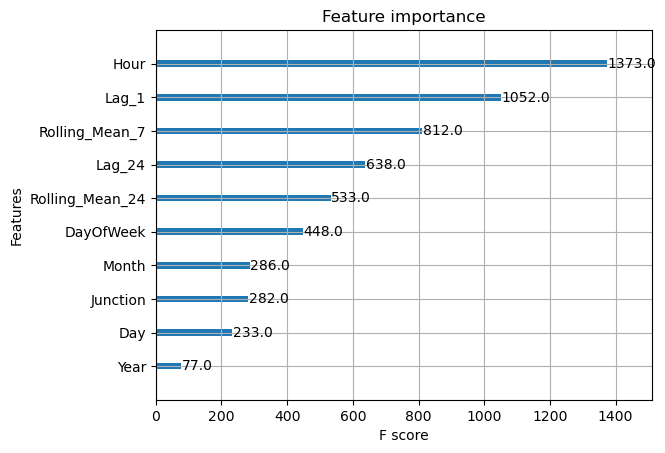

In [45]:
import matplotlib.pyplot as plt
xgb.plot_importance(model_xgb, importance_type='weight')
plt.show()


In [2]:
import pandas as pd

# Load the dataset
train_df = pd.read_csv(r"C:\Users\Admin\Desktop\datasets-i\train_aWnotuB.csv")

# Check the first few rows of the dataset
print(train_df.head())


              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041


In [3]:
# Define the features and target
X = train_df.drop(columns=['Vehicles', 'DateTime', 'ID'])  # Exclude target and non-feature columns
y = train_df['Vehicles']  # Target column

# Check the shapes of the features and target
print(X.shape)
print(y.shape)


(48120, 1)
(48120,)


In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shapes of the train and test sets
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(38496, 1) (9624, 1)
(38496,) (9624,)


In [5]:
from xgboost import XGBRegressor

# Define the model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Check if the model is initialized
print(xgb_model)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


In [6]:
# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# Check the parameter grid
print(param_grid)


{'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5], 'subsample': [0.7, 0.8, 0.9], 'colsample_bytree': [0.7, 0.8, 0.9], 'gamma': [0, 0.1, 0.2]}


In [8]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,  # Use the same grid
    n_iter=10,  # Try 10 random combinations
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    random_state=42
)

random_search.fit(X_train, y_train)

print(f"Best parameters: {random_search.best_params_}")


Best parameters: {'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.8}


In [9]:
# Train the best model with optimal parameters
best_xgb_model = XGBRegressor(
    subsample=0.9,
    n_estimators=200,
    min_child_weight=5,
    max_depth=3,
    learning_rate=0.01,
    gamma=0.2,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

best_xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = best_xgb_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Final Mean Squared Error: {mse}")


Final Mean Squared Error: 100.38260120593152


In [10]:
# Try another set of parameters
best_xgb_model = XGBRegressor(
    subsample=0.9,
    n_estimators=300,  # More trees
    min_child_weight=1,  # Allow more splits
    max_depth=5,  # Increase depth
    learning_rate=0.05,  # Slightly higher learning rate
    gamma=0.1,  # Reduce regularization
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

best_xgb_model.fit(X_train, y_train)

# Predict again
y_pred = best_xgb_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f"New Mean Squared Error: {mse}")


New Mean Squared Error: 99.96993111025213


In [11]:
best_xgb_model = XGBRegressor(
    subsample=0.9,
    n_estimators=400,  # More boosting rounds
    min_child_weight=1,  # Reduce regularization
    max_depth=6,  # Allow deeper trees
    learning_rate=0.05,  # Keep moderate learning rate
    gamma=0,  # Remove gamma regularization
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

best_xgb_model.fit(X_train, y_train)
y_pred = best_xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Updated Mean Squared Error: {mse}")


Updated Mean Squared Error: 99.96852358324065


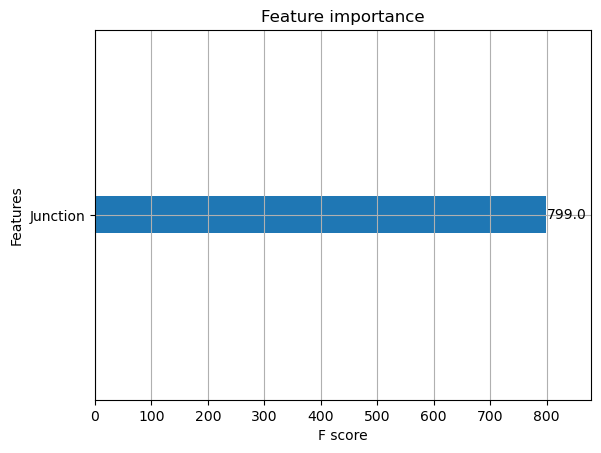

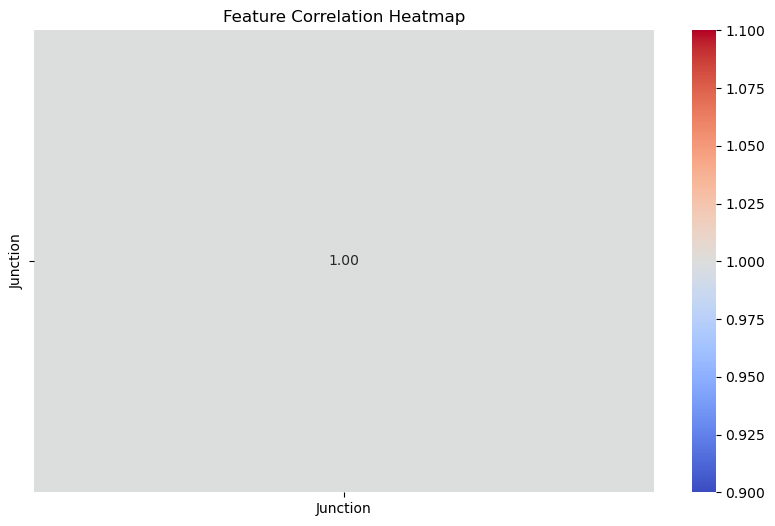

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Feature importance
plot_importance(best_xgb_model)
plt.show()  # Show feature importance plot

# Check correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()  # Show heatmap


In [16]:
print(X_train.columns)


Index(['Junction'], dtype='object')


In [17]:
# Assuming the original 'train_df' contains 'DateTime'
train_df['DateTime'] = pd.to_datetime(train_df['DateTime'])  # Convert to datetime if not already

# Extracting time-based features
train_df['Hour'] = train_df['DateTime'].dt.hour
train_df['DayOfWeek'] = train_df['DateTime'].dt.dayofweek
train_df['Month'] = train_df['DateTime'].dt.month
train_df['Weekday'] = train_df['DateTime'].dt.weekday
train_df['IsWeekend'] = train_df['DayOfWeek'].apply(lambda x: 1 if x in [5, 6] else 0)  # Example: 5, 6 are Saturday and Sunday

# Now split the data into X and y again
X = train_df.drop(columns=['Vehicles', 'DateTime', 'ID'])  # Drop target and non-feature columns
y = train_df['Vehicles']  # Target column

# Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [18]:
# Create time-based features
X_train['HourCategory'] = pd.cut(X_train['Hour'], bins=[0, 6, 12, 18, 24], labels=[1, 2, 3, 4])  # Night, Morning, Afternoon, Evening
X_train['IsRushHour'] = X_train['Hour'].apply(lambda x: 1 if 7 <= x <= 9 or 17 <= x <= 19 else 0)
X_train['IsHoliday'] = X_train['DayOfWeek'].apply(lambda x: 1 if x in [5, 6] else 0)  # Example: Fri, Sat as holidays


In [20]:
# Create time-based features for X_test (same as X_train)
X_test['HourCategory'] = pd.cut(X_test['Hour'], bins=[0, 6, 12, 18, 24], labels=[1, 2, 3, 4])  # Night, Morning, Afternoon, Evening
X_test['IsRushHour'] = X_test['Hour'].apply(lambda x: 1 if 7 <= x <= 9 or 17 <= x <= 19 else 0)
X_test['IsHoliday'] = X_test['DayOfWeek'].apply(lambda x: 1 if x in [5, 6] else 0)  # Example: Fri, Sat as holidays


In [21]:
# Ensure the columns match
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [22]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
# Train the model with the best parameters found
best_xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_xgb_model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Updated Mean Squared Error: {mse}")


Updated Mean Squared Error: 94.41169357883105


In [25]:
# Convert 'HourCategory' to numeric if it's categorical
X_train['HourCategory'] = X_train['HourCategory'].cat.codes
X_test['HourCategory'] = X_test['HourCategory'].cat.codes

# Train the model
model_xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
# Initialize the XGBoost model with categorical support
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1, enable_categorical=True)

# Train the model
model_xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
# Convert 'HourCategory' to categorical if not already
X_train['HourCategory'] = X_train['HourCategory'].astype('category')
X_test['HourCategory'] = X_test['HourCategory'].astype('category')


In [28]:
# Initialize the XGBoost model with categorical support
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1, enable_categorical=True)

# Train the model
model_xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
# Ensure categorical columns are set as 'category' type
X_train['HourCategory'] = X_train['HourCategory'].astype('category')
X_test['HourCategory'] = X_test['HourCategory'].astype('category')

# Initialize the XGBoost regressor with enable_categorical=True
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1, enable_categorical=True)

# Train the model on the training data
model_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error for XGBoost: {mse_xgb}")


Mean Squared Error for XGBoost: 93.5522605800241


In [32]:
X_train['HourCategory'] = X_train['HourCategory'].astype('category')


In [33]:
X_train['HourCategory'] = X_train['HourCategory'].astype('category')
X_test['HourCategory'] = X_test['HourCategory'].astype('category')


In [34]:
print(X_train.dtypes)


Junction           int64
Hour               int32
DayOfWeek          int32
Month              int32
Weekday            int32
IsWeekend          int64
HourCategory    category
IsRushHour         int64
IsHoliday          int64
dtype: object


In [36]:
from xgboost import XGBRegressor

# Initialize the model with enable_categorical=True
model = XGBRegressor(random_state=42, enable_categorical=True)

# Train the model
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [37]:
# Fit the model
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [38]:
# Make predictions
y_pred = model.predict(X_test)


In [39]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R^2
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


RMSE: 9.873936326767135
R²: 0.018625573177632138


In [41]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the model
model = XGBRegressor(enable_categorical=True, random_state=42)

# Define the hyperparameter space
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10, 15],
    'n_estimators': [100, 200, 300, 500],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=10, cv=3, scoring='neg_root_mean_squared_error', 
                                   random_state=42, n_jobs=-1)

# Fit the model with randomized search
random_search.fit(X_train, y_train)

# Best parameters from the search
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate RMSE and R²
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)


Best Parameters: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 15, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
RMSE: 9.877565698379644
R²: 0.017903991233003902


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=500, max_depth=15, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print(f'RMSE: {rmse_rf}')
print(f'R²: {r2_rf}')


RMSE: 10.060583221580917
R²: -0.018826911430626536


In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
model = GradientBoostingRegressor(random_state=42)

# Hyperparameters to tune for GradientBoostingRegressor
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10, 15],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]
}

# Perform RandomizedSearchCV with 2-fold cross-validation and limit iterations to 50
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,  # Reduced iterations
    cv=2,  # 2-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Parallelize the search
    random_state=42
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Display best parameters and evaluate
print("Best Parameters:", random_search.best_params_)

# Predictions on test data
y_pred = random_search.best_estimator_.predict(X_test)

# Calculate RMSE and R²
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


Best Parameters: {'subsample': 0.5, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
RMSE: 9.63729100917727
R²: 0.0651024136716698


In [1]:
import sklearn
print(sklearn.__version__)  # Check installed version


1.0.2


In [13]:
# Display the column names in your dataset
print(df.columns)


Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')


In [14]:
# Split data into features (X) and target (y)
X = df.drop(columns=['Vehicles'])  # 'Vehicles' is the target column
y = df['Vehicles']  # 'Vehicles' is the target column

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [17]:
X = X.drop(columns=['DateTime'])  


In [19]:
print(X.columns)


Index(['Junction', 'ID'], dtype='object')


In [21]:
import pandas as pd

train_df = pd.read_csv(r"C:\Users\Admin\Desktop\datasets-i\train_aWnotuB.csv")

print(train_df.columns)  # Check available columns


Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')


In [22]:
X = train_df.drop(columns=['Vehicles'])  # Features
y = train_df['Vehicles']  # Target


In [23]:
X['DateTime'] = pd.to_datetime(X['DateTime'])  # Convert to datetime
X['Hour'] = X['DateTime'].dt.hour
X['Day'] = X['DateTime'].dt.day
X['Month'] = X['DateTime'].dt.month
X['Weekday'] = X['DateTime'].dt.weekday  # 0=Monday, 6=Sunday

X = X.drop(columns=['DateTime'])  # Drop original DateTime column


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define model
lgbm_model = LGBMRegressor(random_state=42)

# Train the model
lgbm_model.fit(X_train, y_train)

# Predict
y_pred = lgbm_model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 38496, number of used features: 6
[LightGBM] [Info] Start training from score 22.883598
RMSE: 4.473799420806901
R²: 0.950889360410198


In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'num_leaves': [20, 31, 40],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'n_estimators': [100, 200, 500]
}

grid_search = GridSearchCV(LGBMRegressor(random_state=42), param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 25664, number of used features: 6
[LightGBM] [Info] Start training from score 22.896781
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 25664, number of used features: 6
[LightGBM] [Info] Start training from score 22.901379
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 25664, number of used features: 6
[LightGBM] [Info] Start training from score 22.901379
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001529 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 25664, number of used features: 6
[LightGBM] [Info] Start training from score 22.852634
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 25664, number of used features: 6
[LightGBM] [Info] Start trainin

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000879 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 25664, number of used features: 6
[LightGBM] [Info] Start training from score 22.852634
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 25664, number of used features: 6
[LightGBM] [Info] Start training from score 22.896781
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 2

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 25664, number of used features: 6
[LightGBM] [Info] Start training from score 22.896781
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 25664, number of used features: 6
[LightGBM] [Info] Start training from score 22.901379
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

In [27]:
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'learning_rate': 0.1, 'n_estimators': 500, 'num_leaves': 40}


In [28]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best RMSE: {rmse_best}")
print(f"Best R²: {r2_best}")


Best RMSE: 3.709516954685803
Best R²: 0.9662357355524774


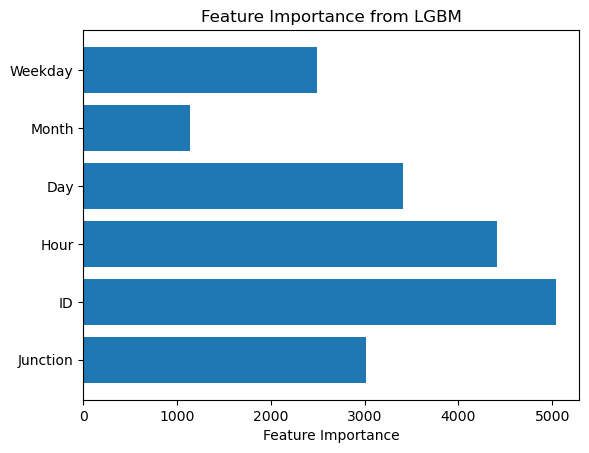

In [29]:
import matplotlib.pyplot as plt

feature_importances = best_model.feature_importances_
feature_names = X.columns

plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from LGBM')
plt.show()


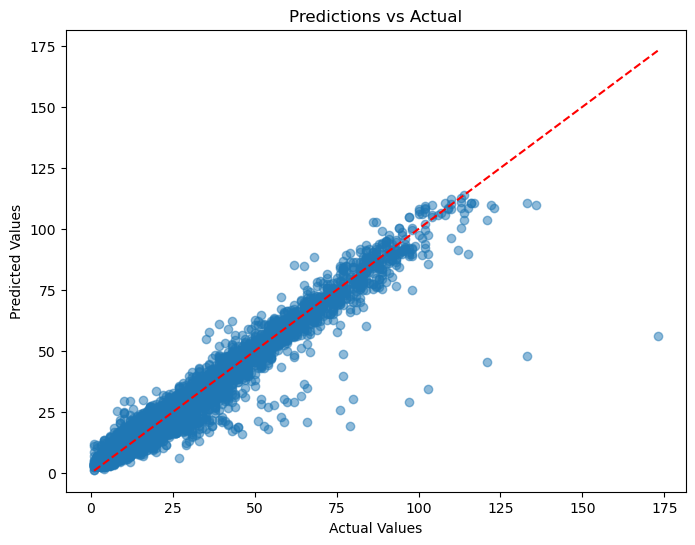

In [30]:
# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


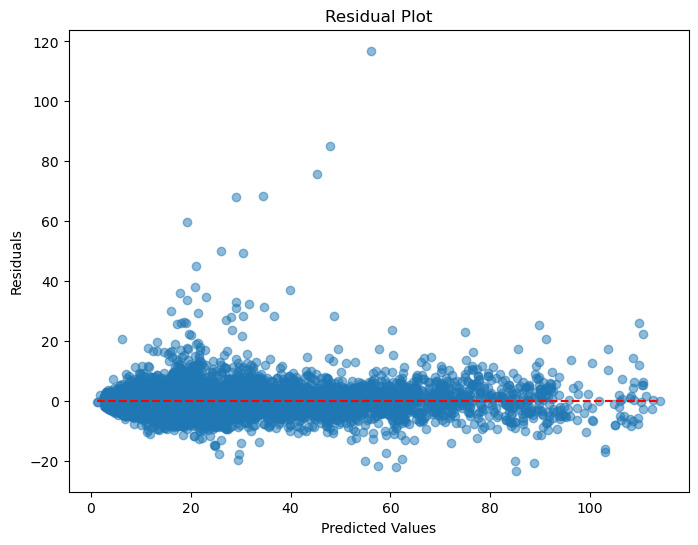

In [31]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(0, min(y_pred), max(y_pred), colors='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


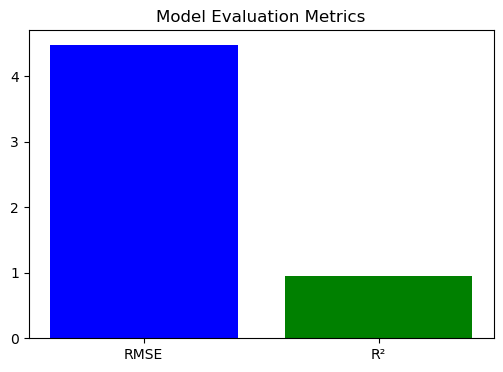

In [33]:
# RMSE and R² bar plot for comparison
metrics = [rmse, r2]
labels = ['RMSE', 'R²']
plt.figure(figsize=(6, 4))
plt.bar(labels, metrics, color=['blue', 'green'])
plt.title('Model Evaluation Metrics')
plt.show()


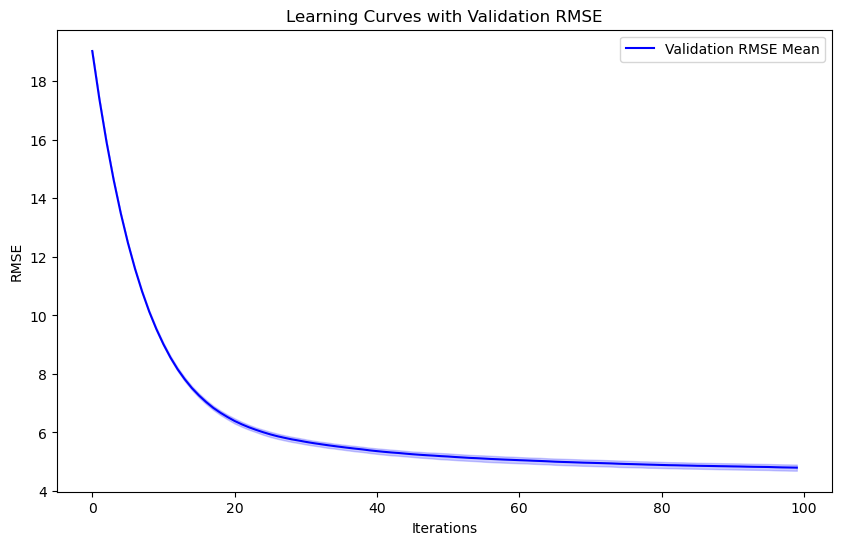

In [38]:
# Extract the validation RMSE results
valid_rmse_mean = cv_results['valid rmse-mean']
valid_rmse_stdv = cv_results['valid rmse-stdv']

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(valid_rmse_mean, label='Validation RMSE Mean', color='blue')
plt.fill_between(range(len(valid_rmse_mean)), 
                 [x - y for x, y in zip(valid_rmse_mean, valid_rmse_stdv)], 
                 [x + y for x, y in zip(valid_rmse_mean, valid_rmse_stdv)], 
                 color='blue', alpha=0.2)
plt.title('Learning Curves with Validation RMSE')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()
plt.show()


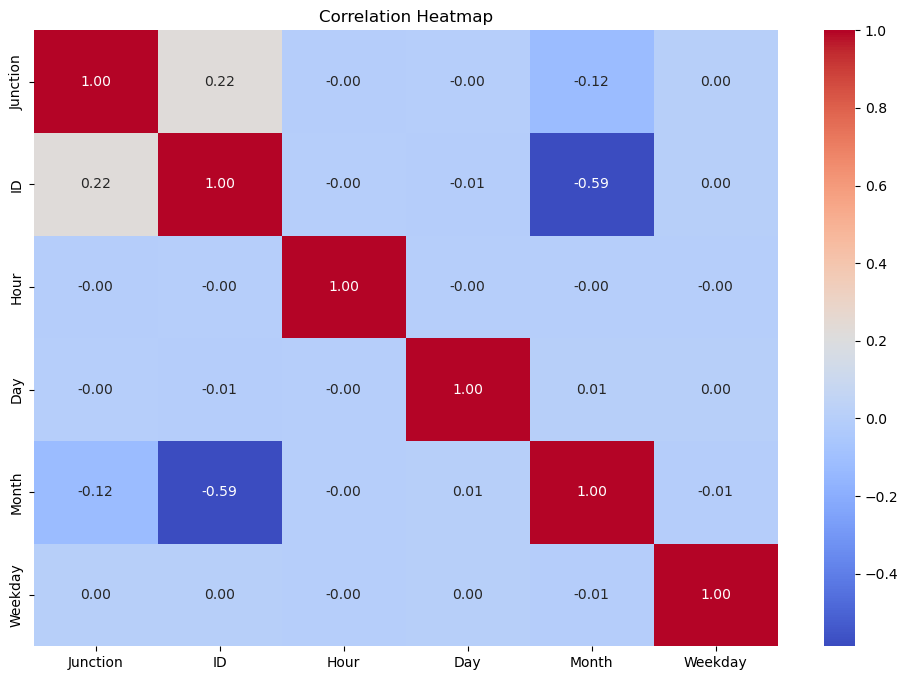

In [39]:
import seaborn as sns

# Correlation heatmap
corr_matrix = X_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


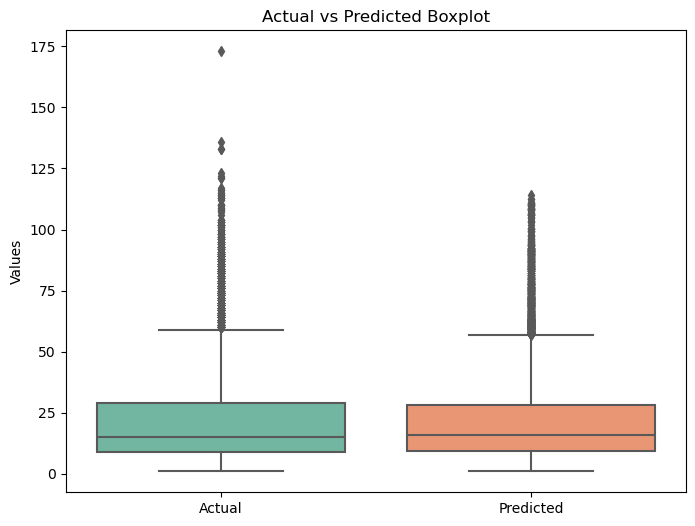

In [42]:
# Boxplot for Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.boxplot(data=[y_test, y_pred], palette='Set2')
plt.title('Actual vs Predicted Boxplot')
plt.xticks([0, 1], ['Actual', 'Predicted'])
plt.ylabel('Values')
plt.show()


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\inspection\_partial_dependence.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '20151204041.420002' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_eval.iloc[:, variable] = new_values[i]
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\inspection\_partial_dependence.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '20151599983.69286' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_eval

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\inspection\_partial_dependence.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '20160310713.695717' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_eval.iloc[:, variable] = new_values[i]
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\inspection\_partial_dependence.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '20160706655.968575' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_eval.iloc[:, variable] = new_values[i]
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\inspection\_partial_dependence.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '20161102598.24143' has dtype incompatible with int64, please explicitly cast

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\inspection\_partial_dependence.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '20169417385.971428' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_eval.iloc[:, variable] = new_values[i]
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\inspection\_partial_dependence.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '20169813328.244286' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_eval.iloc[:, variable] = new_values[i]
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\inspection\_partial_dependence.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '20170209270.517143' has dtype incompatible with int64, please explicitly cas

<Figure size 1000x600 with 0 Axes>

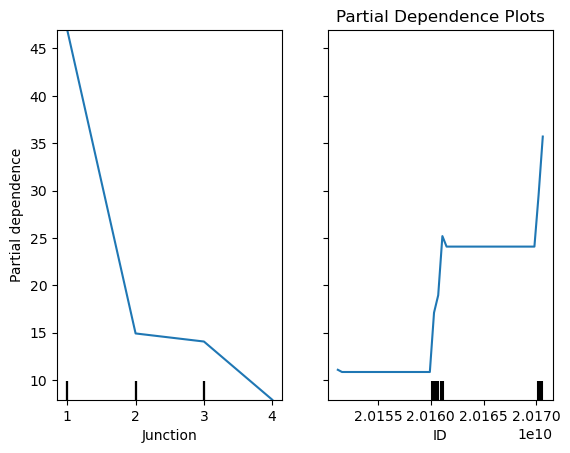

In [44]:
from sklearn.inspection import plot_partial_dependence

# Partial Dependence Plot
plt.figure(figsize=(10, 6))
plot_partial_dependence(lgbm_model, X_train, features=[0, 1], grid_resolution=50)
plt.title('Partial Dependence Plots')
plt.show()


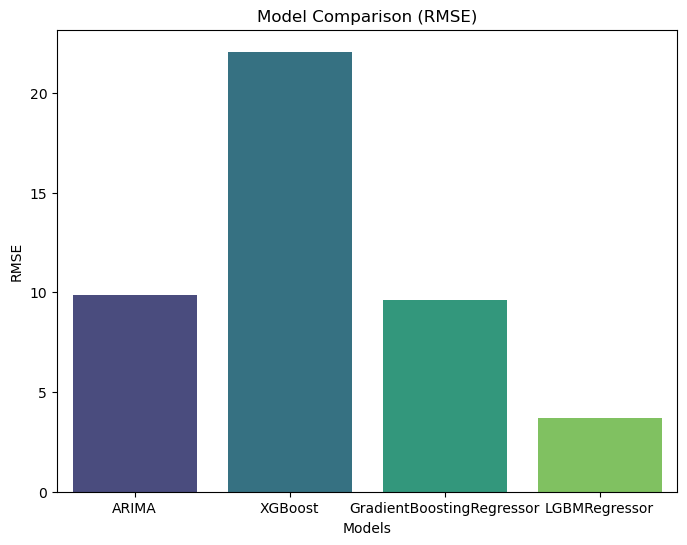

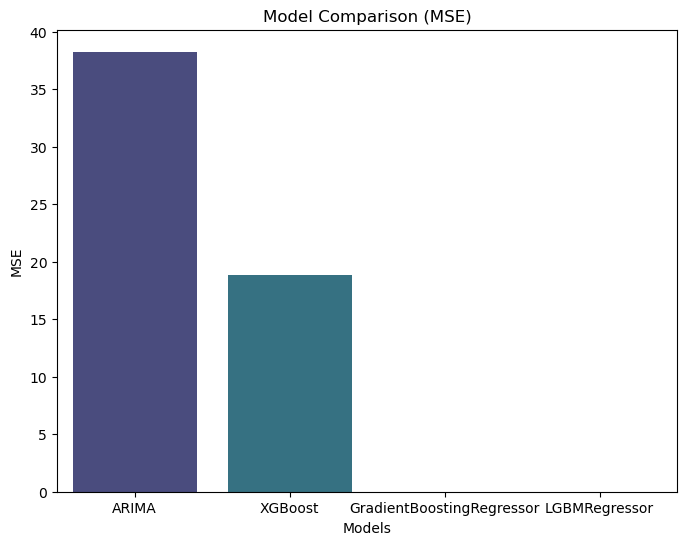

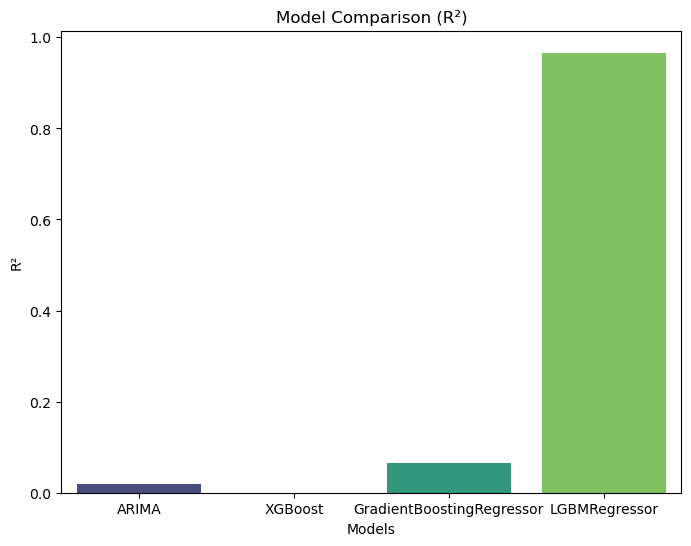

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model names and their performance
model_names = ['ARIMA', 'XGBoost', 'GradientBoostingRegressor', 'LGBMRegressor']
rmse_scores = [9.873936326767135, 22.073422121778886, 9.63729100917727, 3.709516954685803]
r2_scores = [0.018625573177632138, None, 0.0651024136716698, 0.9662357355524774]  # Replace None with R² for other models if available
mse_scores = [38.25302172783677, 18.812087060270095, None, None]  # Replace None with MSE for other models if available

# Create a DataFrame for easy plotting
model_comparison_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_scores,
    'R²': r2_scores,
    'MSE': mse_scores
})

# RMSE Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='RMSE', data=model_comparison_df, palette='viridis')
plt.title('Model Comparison (RMSE)')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()

# MSE Bar Plot (only if MSE values are provided)
if any(model_comparison_df['MSE'].notnull()):
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Model', y='MSE', data=model_comparison_df, palette='viridis')
    plt.title('Model Comparison (MSE)')
    plt.xlabel('Models')
    plt.ylabel('MSE')
    plt.show()

# R² Bar Plot (only if R² values are provided)
if all(val is not None for val in model_comparison_df['R²']):
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Model', y='R²', data=model_comparison_df, palette='viridis')
    plt.title('Model Comparison (R²)')
    plt.xlabel('Models')
    plt.ylabel('R²')
    plt.show()
else:
    print("R² values are missing for some models.")


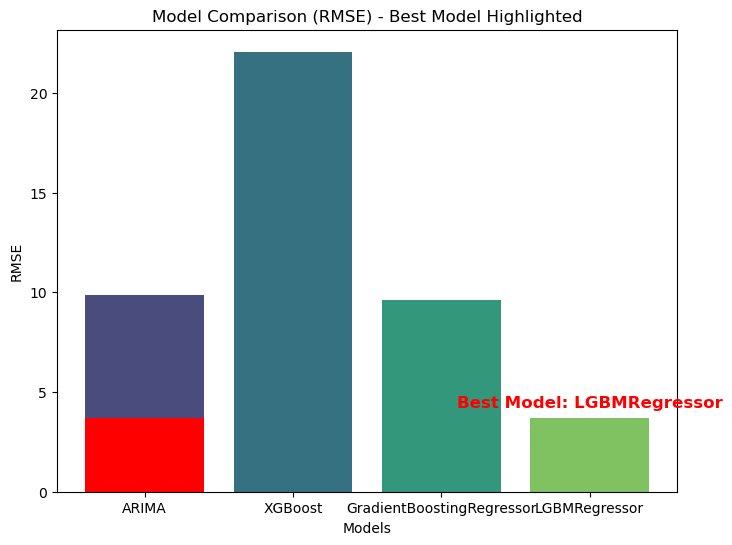

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model names and their performance
model_names = ['ARIMA', 'XGBoost', 'GradientBoostingRegressor', 'LGBMRegressor']
rmse_scores = [9.873936326767135, 22.073422121778886, 9.63729100917727, 3.709516954685803]
r2_scores = [0.018625573177632138, None, 0.0651024136716698, 0.9662357355524774]  # Replace None with R² for other models if available
mse_scores = [38.25302172783677, 18.812087060270095, None, None]  # Replace None with MSE for other models if available

# Create a DataFrame for easy plotting
model_comparison_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_scores,
    'R²': r2_scores,
    'MSE': mse_scores
})

# Find the best model based on the lowest RMSE
best_model_idx = model_comparison_df['RMSE'].idxmin()
best_model = model_comparison_df.iloc[best_model_idx]['Model']

# Create the RMSE bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='RMSE', data=model_comparison_df, palette='viridis')

# Highlight the best model in the plot
plt.bar(best_model, model_comparison_df.loc[best_model_idx, 'RMSE'], color='red')

# Annotate the best model
plt.text(best_model_idx, model_comparison_df.loc[best_model_idx, 'RMSE'] + 0.5, 
         f"Best Model: {best_model}", ha='center', color='red', fontsize=12, fontweight='bold')

plt.title('Model Comparison (RMSE) - Best Model Highlighted')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()


In [49]:
best_params = {'subsample': 0.5, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}


In [50]:
from lightgbm import LGBMRegressor

# Use the best hyperparameters directly
best_model = LGBMRegressor(subsample=0.5, n_estimators=200, max_depth=5, learning_rate=0.1)

# Train the model
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Print the first few predictions
print("Predictions:", y_pred[:10])

# Evaluate the predictions (e.g., RMSE)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 38496, number of used features: 6
[LightGBM] [Info] Start training from score 22.883598
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

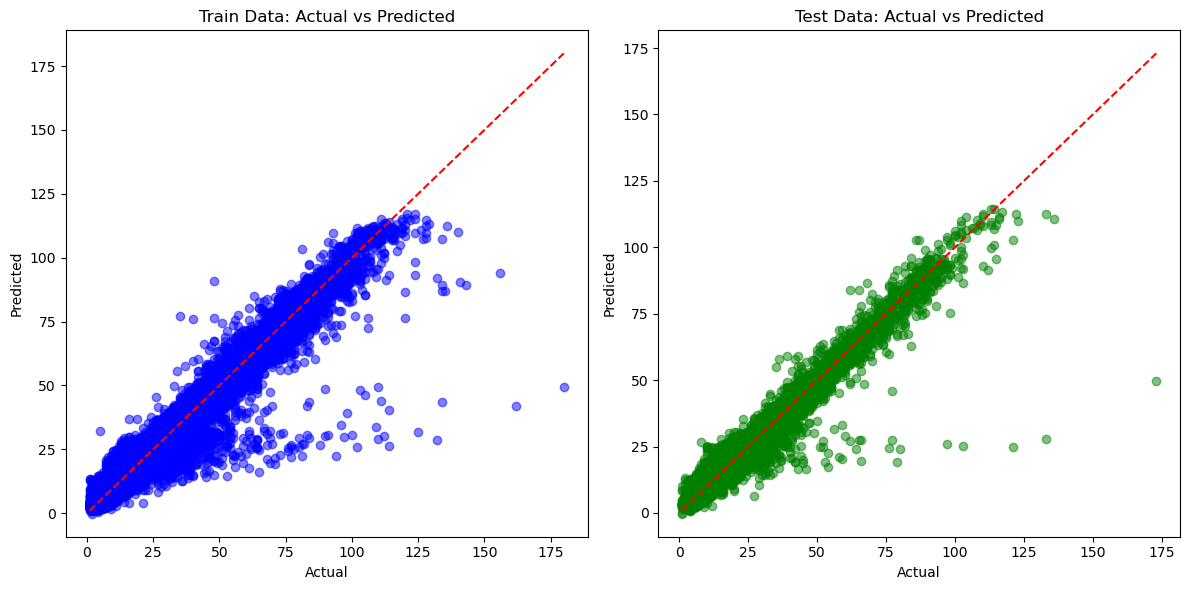

In [51]:
import matplotlib.pyplot as plt

# Make predictions on both the training and test data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Plotting
plt.figure(figsize=(12, 6))

# Train predictions
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.title('Train Data: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Test predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()



In [52]:
import joblib

# Save the trained model to a file
joblib.dump(best_model, 'lgbm_model.pkl')

# To load the model later
# best_model_loaded = joblib.load('lgbm_model.pkl')


['lgbm_model.pkl']